In [314]:
#imports
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['exp2']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Equations solved


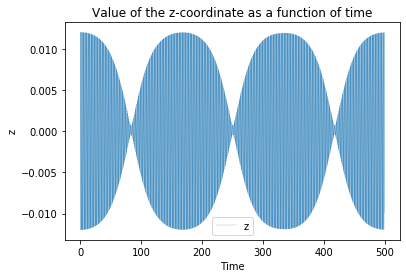

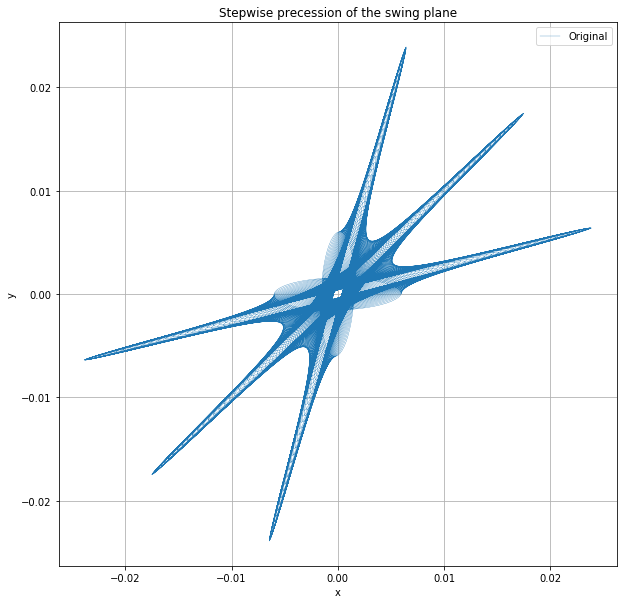

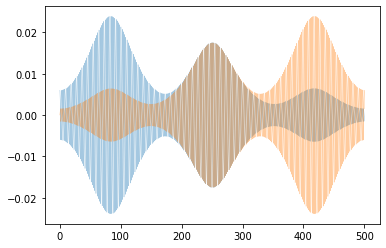

In [315]:
#112 resonance. Define RHS
def RHS(u,t,w):
    """For 1:1:2 resonance"""
    lambd = 3*np.pi**2
    dydt = np.zeros(6)
    x = u[0]
    y = u[2]
    z = u[4]
    dydt[0] = u[1]
    dydt[1] = lambd*x*z-x*w**2
    dydt[2] = u[3]
    dydt[3] = lambd*y*z-y*w**2
    dydt[4] = u[5]
    dydt[5] = lambd/2*(x**2+y**2)-4*w**2*z
    return dydt

%pylab inline
from scipy.integrate import odeint

#test to check everything works
y0d = 0.00489
x0 = 0.006
z0 = 0.012
ic = (x0,0,0,y0d,z0,0)
w = np.pi
l= 1
g = np.pi**2
k = np.pi**2*4
m = 1
l_0 = 3/4*l
lambd = l_0*4*w**2/l
T = 500
t = np.linspace(0,T,12001)
u1 = odeint(RHS,ic,t,args=(w,),atol=0.00000000001)
x = u1[:,0]
y = u1[:,2]
z = u1[:,4]
print('Equations solved')
plt.figure()

#plt.plot(t,x,label='x')
#plt.plot(t,y,label='y')
plt.plot(t,z,label='z', linewidth=0.2)
plt.legend()
plt.title('Value of the z-coordinate as a function of time')
plt.xlabel('Time')
plt.ylabel('z')
plt.show()

plt.figure(figsize=(10,10))
plt.plot(x,y,linewidth=0.3,label='Original')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Stepwise precession of the swing plane')
plt.legend()
plt.show()


plt.plot(t,x,linewidth=0.2)
plt.plot(t,y,linewidth=0.2)

In [316]:
#DEfine RHS for the SVE equations
def envelope_long_RHS(u,t,kappa):
    dudt = np.zeros(6,dtype='float')
    ax=u[0]
    ay=u[1]
    bx=u[2]
    by=u[3]
    cx=u[4]
    cy=u[5]
    dudt[0]= (ax*cy-ay*cx)*kappa
    dudt[1]= -kappa*(ax*cx+ay*cy)
    dudt[2]= kappa*(bx*cy-by*cx)
    dudt[3]= -kappa*(bx*cx+by*cy)
    dudt[4]= kappa/2*(ax*ay+by*bx)
    dudt[5]= -kappa/4*(ax**2-ay**2+bx**2-by**2)
    return dudt

In [317]:

def calculate_initial_conditions_envelope(ic,w):
    """Function that translates IC to complex form"""
    alpha0=np.arctan(-ic[1]/ic[0]/w)
    if ic[2] != 0:
        beta0 = np.arctan(-ic[3]/ic[2]/w)
    else:
        beta0=-np.pi/2

    gamma0 = np.arctan(-ic[5]/ic[4]/w/2)
    a0mod = ic[0]/np.cos(alpha0)
    if ic[2]==0:
        b0mod = -ic[3]/w/np.sin(beta0)
    else:
        b0mod = ic[2]/np.cos(beta0)
    c0mod = ic[4]/np.cos(gamma0)
    print('Initial modulus {}'.format([a0mod,b0mod,c0mod]))
    print('Initial phase {}'.format([alpha0, beta0,gamma0]))
    ic_env = np.zeros(3, dtype='complex')
    ax = a0mod*np.cos(alpha0)
    ay = a0mod*np.sin(alpha0)
    bx = b0mod*np.cos(beta0)
    by = b0mod*np.sin(beta0)
    cx = c0mod*np.cos(gamma0)
    cy = c0mod*np.sin(gamma0)
    
    ic_env = np.array([ax, ay, bx, by, cx, cy]) #A six-vector with the real and imaginary parts
    
    return ic_env, [alpha0,beta0,gamma0]


In [318]:
#Change initial conditions to abc
u0, initial_phase = calculate_initial_conditions_envelope(ic,w)

Initial modulus [0.006, 0.0015565353434387366, 0.012]
Initial phase [0.0, -1.5707963267948966, 0.0]


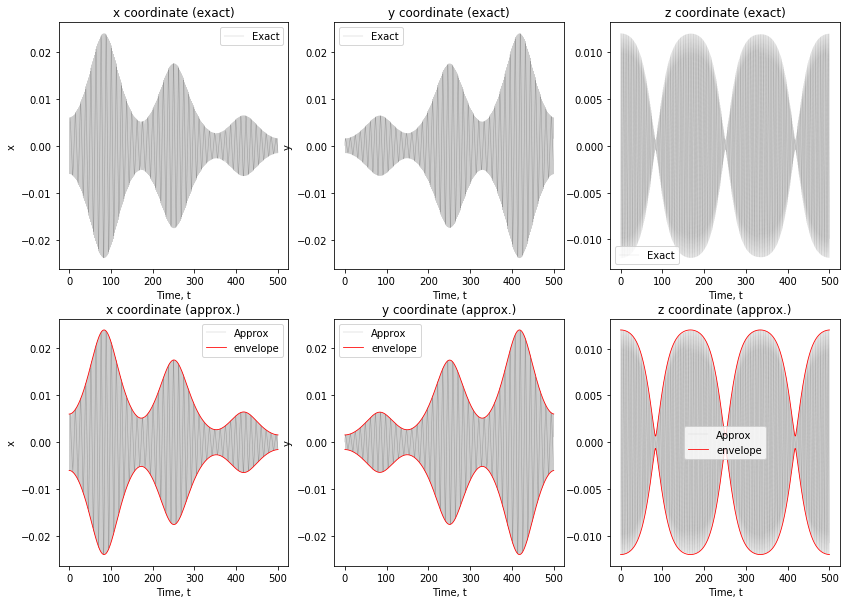

In [322]:
#Solve SVE
u0 = np.array([0.006, 0, 0,-0.0015565353434387366, 0.012, 0])
kappa = lambd/4/(w)
u = odeint(envelope_long_RHS, u0, t, args=(kappa, ), rtol=0.00000000001)
a = u[:,0]+u[:,1]*1.j
b = u[:,2]+u[:,3]*1.j
c = u[:,4]+u[:,5]*1.j
exp1 = np.exp(t*w*1.j)
exp2 = np.exp(2*t*w*1.j)
#extract solution
x_e = np.real(a*exp1)
y_e = np.real(b*exp1)
z_e = np.real(c*exp2)
#plot
plt.figure(figsize=(14,10))
plt.subplot(2,3,3)
plt.plot(t, z,label = 'Exact', linewidth=0.05, c='black')
plt.xlabel('Time, t')
plt.ylabel('z')
plt.title('z coordinate (exact)')
plt.legend()
plt.subplot(2,3,6)
plt.plot(t,z_e,label = 'Approx', linewidth=0.05, c='black')
plt.plot(t,np.abs(c), c = 'r', linewidth=0.8, label='envelope')
plt.plot(t,-np.abs(c), c = 'r', linewidth=0.8)
plt.xlabel('Time, t')
plt.ylabel('z')
plt.title('z coordinate (approx.)')
plt.legend()

plt.subplot(2,3,1)
plt.plot(t, x,label = 'Exact', linewidth=0.1, c='black')
plt.xlabel('Time, t')
plt.ylabel('x')
plt.title('x coordinate (exact)')
plt.legend()
plt.subplot(2,3,4)
plt.plot(t,x_e,label = 'Approx', linewidth=0.1, c='black')
plt.plot(t,np.abs(a), c = 'r', linewidth=0.8, label='envelope')
plt.plot(t,-np.abs(a), c = 'r', linewidth=0.8)
plt.xlabel('Time, t')
plt.ylabel('x')
plt.title('x coordinate (approx.)')
plt.legend()
plt.subplot(2,3,2)
plt.plot(t, y,label = 'Exact', linewidth=0.1, c='black')
plt.legend()
plt.xlabel('Time, t')
plt.title('y coordinate (exact)')
plt.ylabel('y')
plt.subplot(2,3,5)
plt.plot(t,y_e,label = 'Approx', linewidth=0.1, c='black')
plt.plot(t,np.abs(b), c = 'r', linewidth=0.8, label='envelope')
plt.plot(t,-np.abs(b), c = 'r', linewidth=0.8)
plt.xlabel('Time, t')
plt.ylabel('y')
plt.title('y coordinate (approx.)')
plt.legend()
plt.show()

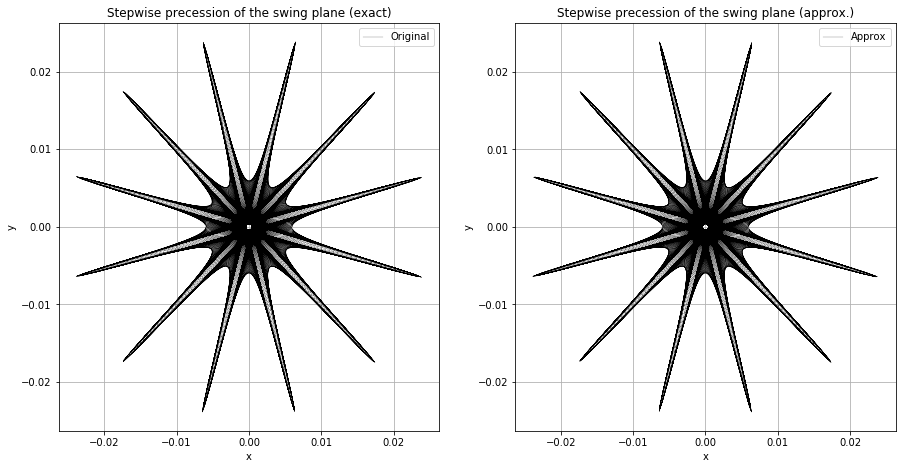

In [171]:
#Plot of the stepwise precession of the swing plane
plt.figure(figsize=(15,7.5))
plt.subplot(1,2,1)
plt.plot(x,y,linewidth=0.2,label='Original', c='black')
plt.title('Stepwise precession of the swing plane (exact)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.subplot(1,2,2)
plt.plot(x_e, y_e, linewidth=0.2, label='Approx', c='black')
#plt.plot(np.abs(a), np.abs(b))
#plt.plot(np.abs(a), -np.abs(b))
#plt.plot(-np.abs(a), np.abs(b))
#plt.plot(-np.abs(a), -np.abs(b))
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Stepwise precession of the swing plane (approx.)')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


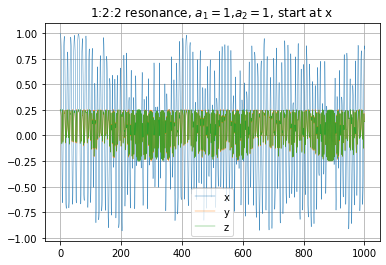

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


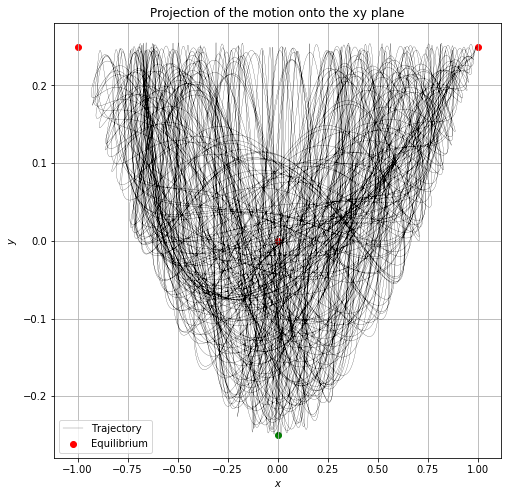

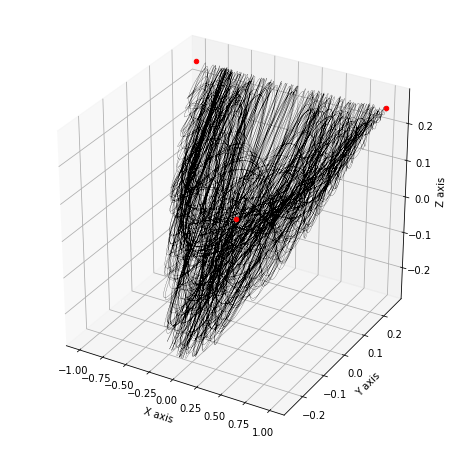

In [312]:
#122 resonance
def RHS2(u,t,a1,a2):
    """For 1:2:2 resonance"""
    dydt = np.zeros(6)
    x = u[0]
    y = u[2]
    z = u[4]
    dydt[0] = u[1]
    dydt[1] = 2*x*(a1*y+a2*z)-x
    dydt[2] = u[3]
    dydt[3] = a1*x**2-4*y
    dydt[4] = u[5]
    dydt[5] = a2*x**2-4*z
    return dydt
#perturb one of the equilibria
x0=1-0.001
y0= 0.25
z0 =0.24
ic = (x0,0,y0,0,z0,0)
a1 = 1
a2 = 1
t = np.linspace(0,1000,1000001)
u = odeint(RHS2,ic,t,args=(a1,a2,))
x = u[:,0]
y = u[:,2]
z = u[:,4]
plt.plot(t,x,label='x', linewidth=0.4)
plt.plot(t,y,label='y', linewidth=0.4)
plt.plot(t,z,label='z', linewidth=0.4)
plt.legend()
plt.title('1:2:2 resonance, $a_1=1$,$a_2=1$, start at x')
plt.grid()
plt.show()
plt.figure(figsize=(8,8))
plt.plot(x,y,linewidth = 0.2,label='Trajectory',c='black')
plt.scatter(0,0, c='r')
plt.scatter(-1, 1/4, c='r',label='Equilibrium')
plt.scatter(1, 1/4, c='r')
plt.scatter(0,-1/4,c='g')
plt.title(r'Projection of the motion onto the xy plane')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid()
plt.legend()
plt.show()
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x,y,z, linewidth=0.2,c='black')
ax.scatter(0,0,0, c='r')
ax.scatter(-1,1/4,1/4, c='r')
ax.scatter(1,1/4,1/4, c='r')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

In [9]:
#SVE envelope for 122
def envelopeRHS_122(vec, t,a1,a2):
    dvecdt = np.zeros(6)
    ax = vec[0]
    ay = vec[1]
    bx = vec[2]
    by = vec[3]
    cx = vec[4]
    cy = vec[5]
    dvecdt[0] = 0.5*(a1*ax*by+a2*ax*cy-a1*ay*bx-a2*ay*cx)
    dvecdt[1] = -0.5*(a1*ax*bx+a2*ax*cx+a1*ay*by+a2*ay*cy)
    dvecdt[2] = a1/4*(ax*ay)
    dvecdt[3] = -a1/8*(ax**2-ay**2)
    dvecdt[4] = a2/4*(ax*ay)
    dvecdt[5] = -a2/8*(ax**2-ay**2)
    
    return dvecdt
#adapt formula for the initial conditions of abc for the 122
def calculate_initial_122(ic):
    
    alpha0=np.arctan(-ic[1]/ic[0])
    if ic[2] != 0:
        beta0 = np.arctan(-ic[3]/ic[2]/2)
    else:
        beta0=-np.pi/2

    gamma0 = np.arctan(-ic[5]/ic[4]/2)
    a0mod = ic[0]/np.cos(alpha0)
    if ic[2]==0:
        b0mod = -ic[3]/2/np.sin(beta0)
    else:
        b0mod = ic[2]/np.cos(beta0)
    c0mod = ic[4]/np.cos(gamma0)
    print('Initial modulus {}'.format([a0mod,b0mod,c0mod]))
    print('Initial phase {}'.format([alpha0, beta0,gamma0]))
    ic_env = np.zeros(3, dtype='complex')
    ax = a0mod*np.cos(alpha0)
    ay = a0mod*np.sin(alpha0)
    bx = b0mod*np.cos(beta0)
    by = b0mod*np.sin(beta0)
    cx = c0mod*np.cos(gamma0)
    cy = c0mod*np.sin(gamma0)
    
    ic_env = np.array([ax, ay, bx, by, cx, cy]) #A six-vector with the real and imaginary parts
    print(ic_env)
    return ic_env, [alpha0,beta0,gamma0]

Initial modulus [0.999, 0.05, 0.25]
Initial phase [0.0, -1.5707963267948966, 0.0]
[ 9.990000e-01  0.000000e+00  3.061617e-18 -5.000000e-02  2.500000e-01
  0.000000e+00]


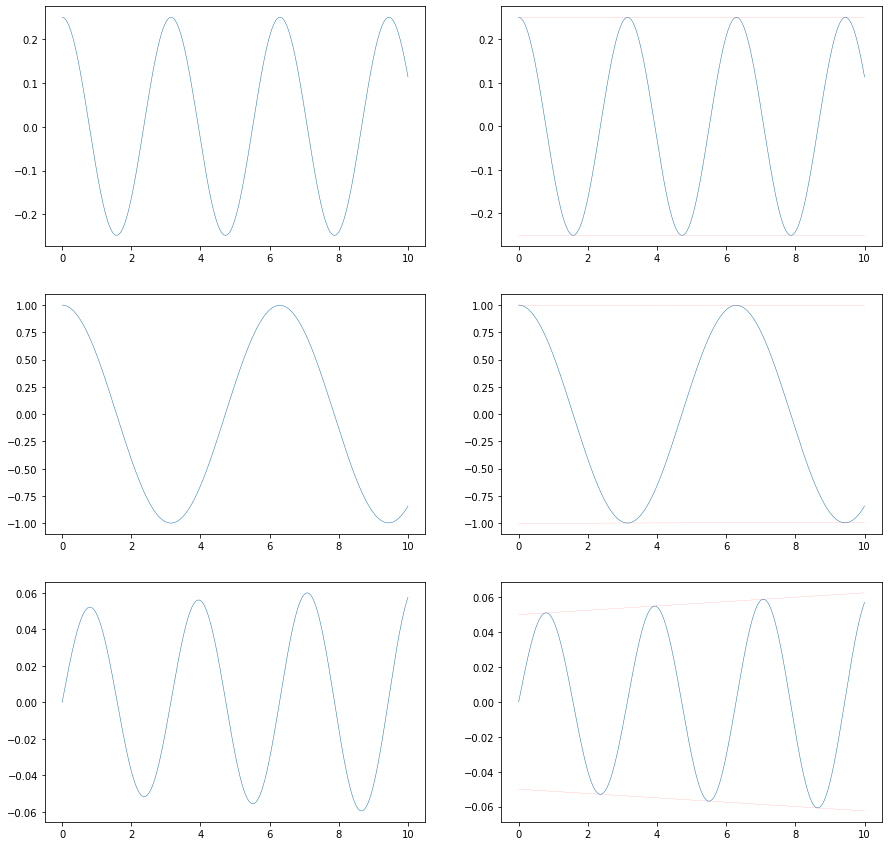

In [253]:
#Check approximation works 

u0, initial_phase = calculate_initial_122(ic)

w = 1
u = odeint(envelopeRHS_122, u0, t, args=(a1,a2,))
a = u[:,0]+u[:,1]*1.j
b = u[:,2]+u[:,3]*1.j
c = u[:,4]+u[:,5]*1.j
exp1 = np.exp(t*w*1.j)
exp2 = np.exp(2*t*w*1.j)
x_e = np.real(a*exp1)
y_e = np.real(b*exp2)
z_e = np.real(c*exp2)
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.plot(t, z,label = 'exact', linewidth=0.5)
plt.subplot(3,2,2)
plt.plot(t,z_e,label = 'approx', linewidth=0.5)
plt.plot(t,np.abs(c), c = 'r', linewidth=0.1)
plt.plot(t,-np.abs(c), c = 'r', linewidth=0.1)

plt.subplot(3,2,3)
plt.plot(t, x,label = 'exact', linewidth=0.5)
plt.subplot(3,2,4)
plt.plot(t,x_e,label = 'approx', linewidth=0.5)
plt.plot(t,np.abs(a), c = 'r', linewidth=0.1)
plt.plot(t,-np.abs(a), c = 'r', linewidth=0.1)

plt.subplot(3,2,5)
plt.plot(t, y,label = 'exact', linewidth=0.5)
plt.subplot(3,2,6)
plt.plot(t,y_e,label = 'approx', linewidth=0.5)
plt.plot(t,np.abs(b), c = 'r', linewidth=0.1)
plt.plot(t,-np.abs(b), c = 'r', linewidth=0.1)
plt.show()

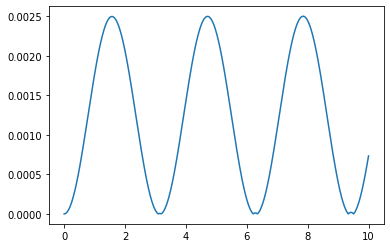

In [254]:
plt.plot(t, np.abs(z-z_e))